# Beat-finding using Fourier transform

Finding a best-describing underlying beat in a sequence can be done using [Fourier transforms](https://en.wikipedia.org/wiki/Fourier_transform), where we decompose a signal into its frequency components.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', message="Matplotlib ")

We create an example sequence, and initiate a random number generator with a seed, so you will get the same output as we:

In [2]:
from thebeat import Sequence
import numpy as np

rng = np.random.default_rng(seed=123)

seq = Sequence.generate_random_normal(n_events=100, mu=500, sigma=25, rng=rng)

Now we plot the Fourier transform. Because we created our Sequence object using millisecond values, we will choose a unit size of 1000.

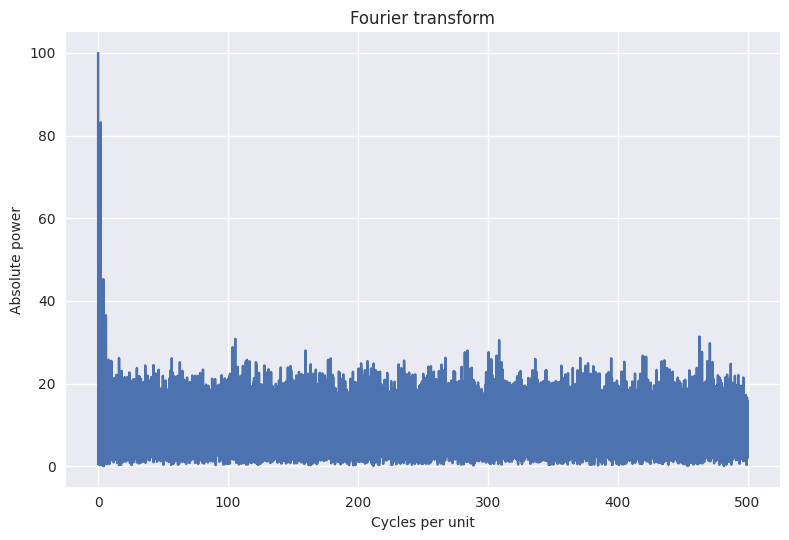

In [3]:
from thebeat.stats import fft_plot

fft_plot(seq, unit_size=1000);

In [ ]:
On the

To investigate the plot in more detail, we can limit the *x* axis, which will help:

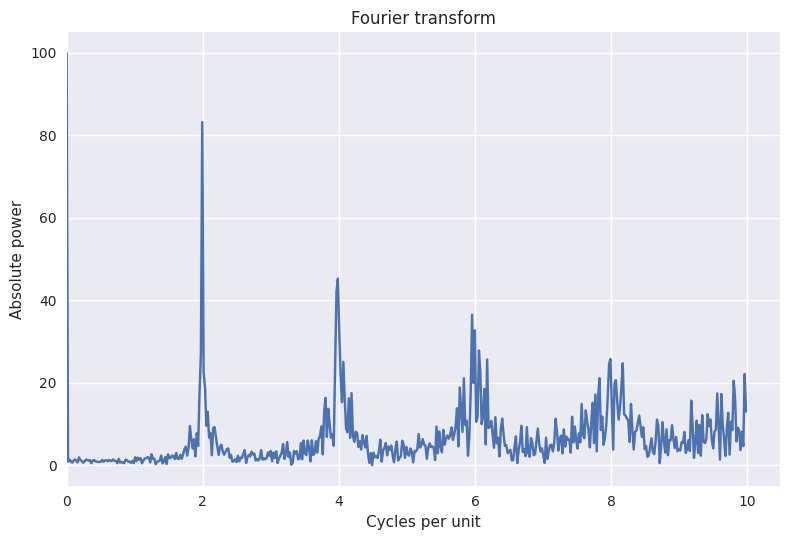

In [4]:
fft_plot(seq, unit_size=1000, x_max=10);

We see a *very* clear peak at around 2 cycles per second, i.e. every 500 ms.

---

501.8585858585858


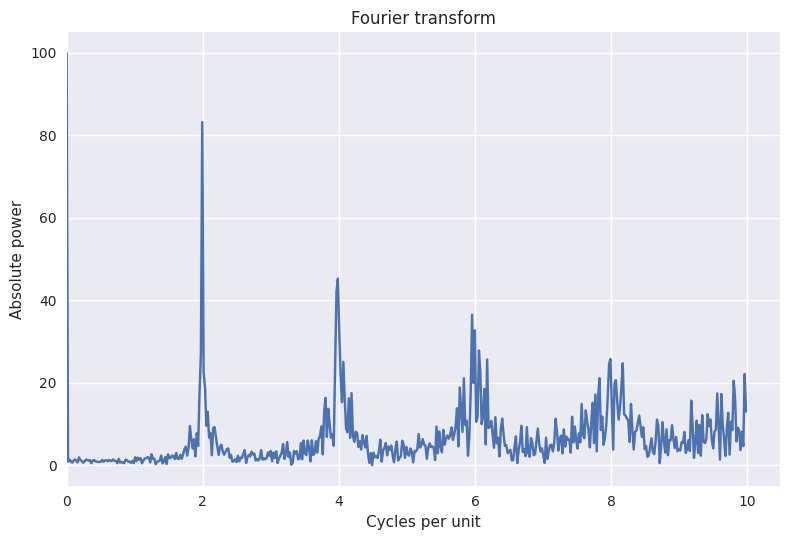

In [5]:
# Create the plot
fig, ax = fft_plot(seq, unit_size=1000, x_max=10)

# Get the data
x_data, y_data = ax.lines[0].get_data()

# Remove the values at x = 0, because there the power will always be the highest
x_data, y_data = x_data[1:], y_data[1:]

# Get the index of the highest value for y, and get its corresponding x value
max_y_index = np.argmax(y_data)
max_x = x_data[max_y_index]
print(1000 / max_x)